In [187]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
sns.set_style("whitegrid")
sns.set_context("poster")

In [188]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [189]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [190]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [191]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [192]:
test = pd.read_csv("test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [193]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [194]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [195]:
df.drop(axis=1, labels= "Cabin", inplace= True)
test.drop(axis=1, labels = "Cabin", inplace = True)

In [196]:
age_df = pd.Series(df.Age)
age_test = pd.Series(test.Age)
age = pd.concat([age_df, age_test])
age = age.dropna()
len(age)

1046

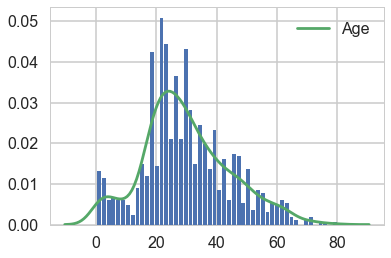

In [197]:
plt.hist(age, rwidth=0.8, bins = 50, normed=True)
sns.kdeplot(age)
plt.show()

In [198]:
print("mean_Age = {:f}, median_Age = {:f}, Mode_Age= {:f} ".format(age.mean(), age.median(), age.mode()[0])) 

mean_Age = 29.881138, median_Age = 28.000000, Mode_Age= 24.000000 


In [199]:
df.Age.fillna(inplace=True, value = 24)
test.Age.fillna(inplace=True, value = 24)

In [200]:
print(df.Embarked.mode()[0])
print(test.Embarked.mode()[0])

S
S


In [201]:
df.Embarked.fillna(value="S", inplace=True)
test.Embarked.fillna(value="S", inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [202]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [336]:
test[test.Fare.isnull()]

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
152,3,60.5,0,0,NaN,0,1,0,0,1


In [349]:
full = pd.concat([df, test])
full["Ticket_header"] = full.Ticket.str.extract("([a-zA-Z0-9]{3})", expand=False)

In [350]:
full[full.Ticket_header =="370"]['Fare'].mean()

11.764583333333334

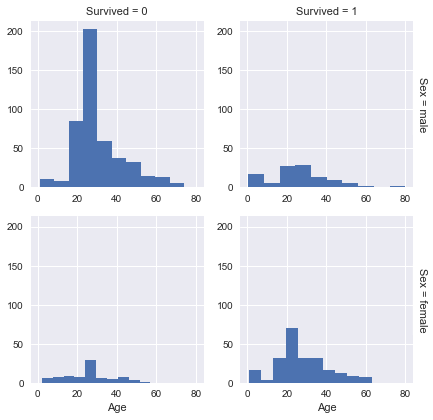

In [204]:
sns.set()
g1 = sns.FacetGrid(data= df, col="Survived", row = "Sex", margin_titles=True )
g1.map(plt.hist, "Age")
plt.show()

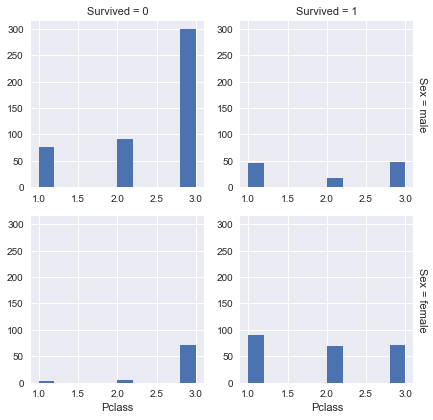

In [205]:
g2 = sns.FacetGrid(data= df, col="Survived", row = "Sex", margin_titles=True )
g2.map(plt.hist, "Pclass")
plt.show()

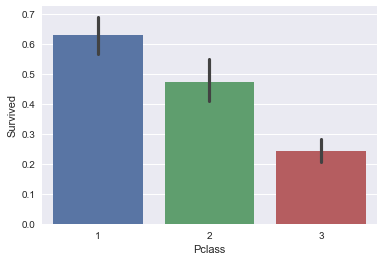

In [206]:
sns.barplot(x='Pclass', y='Survived', data=df);

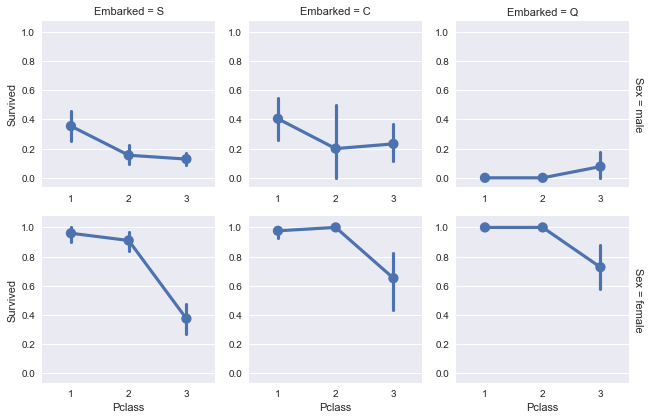

In [207]:
g3 = sns.FacetGrid(data= df, col="Embarked", row = "Sex", margin_titles=True )
g3.map(sns.pointplot, "Pclass", "Survived")
plt.show()

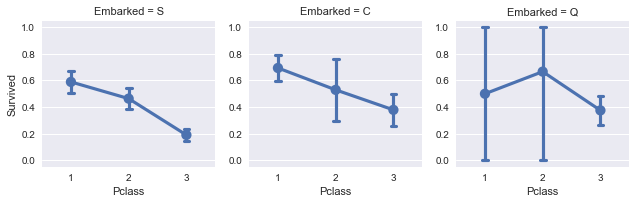

In [208]:
g4 = sns.FacetGrid(data= df, col="Embarked", margin_titles=True )
g4.map(sns.pointplot, "Pclass", "Survived", capsize = 0.1)
plt.show()

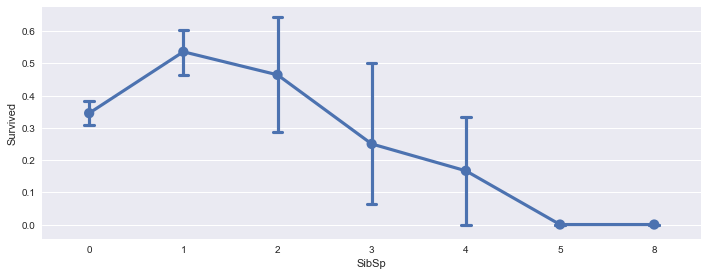

In [209]:
sns.factorplot("SibSp", "Survived", data= df, aspect = 2.5, capsize= 0.1);

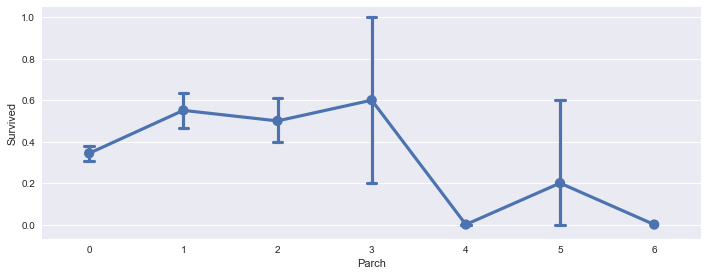

In [210]:
sns.factorplot("Parch", "Survived", data = df, aspect = 2.5, capsize = 0.1);

In [211]:
# If you want to use One Hot Encoding, I am using get dummies function of pandas
'''
categorical_df = df.select_dtypes(include= [object])
categorical_df = categorical_df[["Sex","Embarked"]]

from sklearn import preprocessing

le = preprocessing.LabelEncoder()
categorical_df2 = categorical_df.apply(le.fit_transform)

enc = preprocessing.OneHotEncoder()
enc.fit(categorical_df2)
categorical_ohl = enc.transform(categorical_df2).toarray()
print(categorical_ohl[:5])
'''

'\ncategorical_df = df.select_dtypes(include= [object])\ncategorical_df = categorical_df[["Sex","Embarked"]]\n\nfrom sklearn import preprocessing\n\nle = preprocessing.LabelEncoder()\ncategorical_df2 = categorical_df.apply(le.fit_transform)\n\nenc = preprocessing.OneHotEncoder()\nenc.fit(categorical_df2)\ncategorical_ohl = enc.transform(categorical_df2).toarray()\nprint(categorical_ohl[:5])\n'

In [212]:
df= pd.get_dummies(df, columns=['Sex', 'Embarked'])
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1


In [213]:
test = pd.get_dummies(test, columns=['Sex', 'Embarked'])

In [214]:
train = df.drop(axis=1, inplace=False, labels=["PassengerId", "Name", "Ticket"])
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [215]:
test = test.drop(axis=1, inplace=False, labels = ["PassengerId", "Name", "Ticket"])

In [216]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [217]:
def cv_optimizer(model, parameters, X, y, n_jobs=1, n_folds=5, score_func = None):
    if score_func:
        gs = GridSearchCV(model, param_grid=parameters, cv= n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(model, param_grid=parameters, cv = n_folds, n_jobs=n_jobs)
    gs.fit(X,y)
    print("Best parameter:", gs.best_params_,"\nBest Score:", gs.best_score_) # use gs.cv_results_ for elaborate results
    best = gs.best_estimator_
    return best

In [218]:
def do_classify(model, parameters, indf, featurenames, targetname, target1val, mask = None, reuse_split = None, score_func=None, n_folds=5, n_jobs=1):
    X = indf[featurenames].values
    y = (indf[targetname].values == target1val)*1
    try:
        if (mask!= None).all():
            print("using mask")
            Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    except:
        pass
    if reuse_split != None:
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        model = cv_optimizer(model, parameters, Xtrain, ytrain, n_jobs, n_folds, score_func)
    model.fit(Xtrain, ytrain)
    training_accuracy = model.score(Xtrain, ytrain)
    testing_accuracy = model.score(Xtest, ytest)
    print("########### Based on Standard Predict ###########")
    print("Accuracy on training data: {:0.2f}".format(training_accuracy))
    print("Accuracy on testing data: {:0.2f}".format(testing_accuracy))
    print(confusion_matrix(ytest, model.predict(Xtest)))
    print("#################################################")
    return model, Xtrain, Xtest, ytrain, ytest
    

In [219]:
itrain, itest = train_test_split(range(train.shape[0]), train_size =0.6)
mask = np.ones(df.shape[0], dtype = 'int')
mask[itrain] = 1
mask[itest] = 0
mask = (mask==1)
mask[:10]

C:\Users\Sukant\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


array([ True,  True,  True,  True,  True,  True,  True,  True,  True, False], dtype=bool)

In [276]:
features = list(train.columns.values)[1:]
features

['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [313]:
clflog = LogisticRegression()
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
clflog, Xtrain, Xtest, ytrain, ytest = do_classify(clflog, parameters, train,features, 'Survived', 1, mask=mask)

using mask
Best parameter: {'C': 10} 
Best Score: 0.795880149813
########### Based on Standard Predict ###########
Accuracy on training data: 0.81
Accuracy on testing data: 0.79
[[183  34]
 [ 40 100]]
#################################################


In [314]:
clflog.score(X=Xtest, y=ytest)

0.79271708683473385

In [315]:
clflog.predict_proba(Xtest)

array([[ 0.06939239,  0.93060761],
       [ 0.90102039,  0.09897961],
       [ 0.9119996 ,  0.0880004 ],
       [ 0.53969421,  0.46030579],
       [ 0.82605883,  0.17394117],
       [ 0.25273006,  0.74726994],
       [ 0.45890236,  0.54109764],
       [ 0.64444992,  0.35555008],
       [ 0.91362683,  0.08637317],
       [ 0.41727512,  0.58272488],
       [ 0.9404195 ,  0.0595805 ],
       [ 0.3818978 ,  0.6181022 ],
       [ 0.72808909,  0.27191091],
       [ 0.90431765,  0.09568235],
       [ 0.23737169,  0.76262831],
       [ 0.80498612,  0.19501388],
       [ 0.91362683,  0.08637317],
       [ 0.91066465,  0.08933535],
       [ 0.32162597,  0.67837403],
       [ 0.88324019,  0.11675981],
       [ 0.41852911,  0.58147089],
       [ 0.07881647,  0.92118353],
       [ 0.25122718,  0.74877282],
       [ 0.63134846,  0.36865154],
       [ 0.83014452,  0.16985548],
       [ 0.96276073,  0.03723927],
       [ 0.79293176,  0.20706824],
       [ 0.28201389,  0.71798611],
       [ 0.19862029,

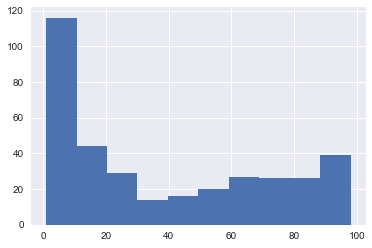

In [316]:
plt.hist(clflog.predict_proba(Xtest)[:,1]*100);

In [317]:
reuse_split = dict(Xtrain = Xtrain, ytrain = ytrain, Xtest = Xtest, ytest = ytest)

In [318]:
clfgnb = GaussianNB()
clfgnb, Xtrain, Xtest, ytrain, ytest = do_classify(clflog, None, train,features, 'Survived', 1, reuse_split=reuse_split)

########### Based on Standard Predict ###########
Accuracy on training data: 0.81
Accuracy on testing data: 0.79
[[183  34]
 [ 40 100]]
#################################################


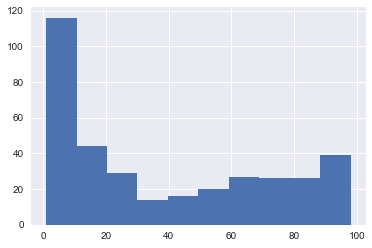

In [319]:
plt.hist(clfgnb.predict_proba(Xtest)[:,1]*100);

In [320]:
from sklearn.svm  import SVC
clfsvm = SVC(kernel = "linear")
parameters = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
clfsvm, Xtrain, Xtest, ytrain, ytest = do_classify(clfsvm, parameters, train,features, 'Survived', 1, reuse_split=reuse_split)

Best parameter: {'C': 0.01} 
Best Score: 0.795880149813
########### Based on Standard Predict ###########
Accuracy on training data: 0.79
Accuracy on testing data: 0.80
[[188  29]
 [ 44  96]]
#################################################


In [321]:
from sklearn.metrics import classification_report

In [322]:
print("######## Logistic Regression Report #########")
print(classification_report(ytest, clflog.predict(Xtest)))

######## Logistic Regression Report #########
             precision    recall  f1-score   support

          0       0.82      0.84      0.83       217
          1       0.75      0.71      0.73       140

avg / total       0.79      0.79      0.79       357



In [323]:
print("######## Navie Bayes Regression Report #########")
print(classification_report(ytest, clfgnb.predict(Xtest)))

######## Navie Bayes Regression Report #########
             precision    recall  f1-score   support

          0       0.82      0.84      0.83       217
          1       0.75      0.71      0.73       140

avg / total       0.79      0.79      0.79       357



In [324]:
print("######## SVM Regression Report #########")
print(classification_report(ytest, clfsvm.predict(Xtest)))

######## SVM Regression Report #########
             precision    recall  f1-score   support

          0       0.81      0.87      0.84       217
          1       0.77      0.69      0.72       140

avg / total       0.79      0.80      0.79       357



In [325]:
from  sklearn.metrics import roc_curve, auc

In [326]:
roc_curve(ytest, clflog.predict_proba(Xtest)[:,1])

(array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.00460829,  0.00460829,  0.00921659,  0.00921659,  0.01843318,
         0.01843318,  0.02304147,  0.02304147,  0.02764977,  0.02764977,
         0.03225806,  0.03225806,  0.03225806,  0.03686636,  0.03686636,
         0.04147465,  0.04147465,  0.05990783,  0.05990783,  0.06451613,
         0.06451613,  0.07373272,  0.07373272,  0.07834101,  0.07834101,
         0.0875576 ,  0.0921659 ,  0.09677419,  0.10138249,  0.10138249,
         0.11059908,  0.11059908,  0.11981567,  0.11981567,  0.12442396,
         0.12903226,  0.14746544,  0.14746544,  0.15668203,  0.16589862,
         0.1797235 ,  0.1797235 ,  0.20276498,  0.20276498,  0.21658986,
         0.21658986,  0.22119816,  0.22119816,  0.22580645,  0.22580645,
         0.23963134,  0.23963134,  0.26267281,  0.26267281,  0.2718894 ,
         0.2718894 ,  0.28571429,  0.28571429,  0.29032258,  0.29032258,
         0.29493088,  0.30414747,  0.30875576,  0.3

In [327]:
def make_roc(name, clf, ytest, xtest, ax=None, labe=5, proba=True, skip=0):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    roc_auc = auc(fpr, tpr)
    if skip:
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
    )
    for k in range(0, fpr.shape[0],labe):
        #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
        threshold = str(np.round(thresholds[k], 2))
        ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    if initial:
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    return ax

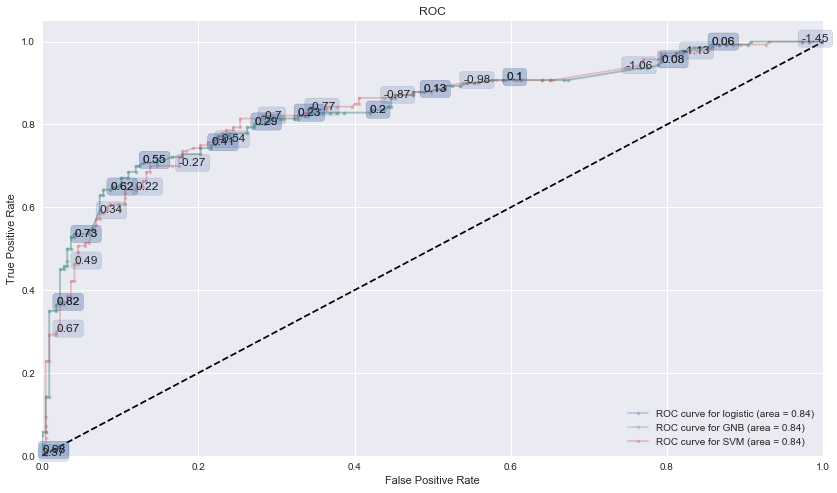

In [328]:
fig = plt.gcf()
fig.set_size_inches(14, 8, forward=True)
ax=make_roc("logistic", clflog, ytest, Xtest, labe=10)
make_roc("GNB", clfgnb, ytest, Xtest, ax, labe=10)
make_roc("SVM", clfsvm, ytest, Xtest, ax, labe=10,proba=False)

In [329]:
type(train.Survived.values)

numpy.ndarray

In [330]:
from sklearn import tree 

In [331]:
clftree = tree.DecisionTreeClassifier()
parameters_tree = {"max_depth" : [1,2,3,4,5,6,7], "min_samples_leaf":[1,2,3,4,5,6]}
clftree, Xtrain, Xtest, ytrain, ytest = do_classify(clftree, parameters_tree, train,features, 'Survived', 1, reuse_split=reuse_split)

Best parameter: {'max_depth': 4, 'min_samples_leaf': 1} 
Best Score: 0.822097378277
########### Based on Standard Predict ###########
Accuracy on training data: 0.84
Accuracy on testing data: 0.81
[[193  24]
 [ 45  95]]
#################################################


In [265]:
from sklearn.ensemble import RandomForestClassifier

In [275]:
features

['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [277]:
features.remove("Fare")

In [279]:

clfForest = RandomForestClassifier()
parameters_rf = {"n_estimators":}
clfForest, Xtrain, Xtest, ytrain, ytest = do_classify(clfForest, parameters_rf, 
                                                    train, features, 'Survived', 1, n_jobs=2, reuse_split=reuse_split)

Best parameter: {'n_estimators': 40} 
Best Score: 0.812734082397
########### Based on Standard Predict ###########
Accuracy on training data: 0.99
Accuracy on testing data: 0.78
[[176  41]
 [ 36 104]]
#################################################


In [280]:
importance_list = clfForest.feature_importances_


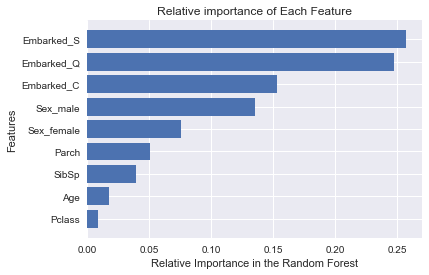

In [306]:
importance_list, feature_list = zip(*sorted(zip(importance_list, features)))
plt.barh(range(len(feature_list)), importance_list)
plt.yticks(range(len(feature_list)), feature_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

In [307]:
from sklearn.ensemble import AdaBoostClassifier

clfAda = AdaBoostClassifier()

parameters = {"n_estimators": range(10, 60)}
clfAda, Xtrain, ytrain, Xtest, ytest = do_classify(clfAda, parameters, 
                                                       train, features, 'Survived', 1, reuse_split=reuse_split, 
                                                       n_jobs = 2, score_func='f1')


Best parameter: {'n_estimators': 18} 
Best Score: 0.73696925074
########### Based on Standard Predict ###########
Accuracy on training data: 0.84
Accuracy on testing data: 0.78
[[176  41]
 [ 38 102]]
#################################################


In [308]:
from sklearn.ensemble import GradientBoostingClassifier

clfGB = GradientBoostingClassifier()

parameters = {"n_estimators": range(30, 60), "max_depth": [1, 2, 3, 4, 5]}
clfGB, Xtrain, ytrain, Xtest, ytest = do_classify(clfGB, parameters, 
                                                       train, features, 'Survived', 1, reuse_split=reuse_split, 
                                                       n_jobs = 2, score_func='f1')

Best parameter: {'max_depth': 3, 'n_estimators': 33} 
Best Score: 0.739764489404
########### Based on Standard Predict ###########
Accuracy on training data: 0.88
Accuracy on testing data: 0.80
[[189  28]
 [ 43  97]]
#################################################


In [355]:
np.arange(1,31,10)

array([ 1, 11, 21])